In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customer = pd.read_csv('D:/Analytics class/PROJECT/Python/Python Foundation Case Study 1 - Retail Case Study/Customer.csv')
prodcat = pd.read_csv('D:/Analytics class/PROJECT/Python/Python Foundation Case Study 1 - Retail Case Study/prod_cat_info.csv')
transactions = pd.read_csv('D:/Analytics class/PROJECT/Python/Python Foundation Case Study 1 - Retail Case Study/Transactions.csv')

In [3]:
customer.head(2)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0


In [4]:
prodcat.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [5]:
transactions.head(2)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. 

In [6]:
customer_final = pd.merge( left = customer , right= transactions ,how = 'right' ,left_on= 'customer_Id',  right_on= 'cust_id' )

In [7]:
customer_final = pd.merge( left = customer_final , right= prodcat ,how = 'left',  left_on = ['prod_subcat_code' , 'prod_cat_code'] , right_on=['prod_sub_cat_code','prod_cat_code']  )

In [8]:
customer_final.drop(labels= ['cust_id' ,'prod_sub_cat_code'],  axis= 1 , inplace= True)
customer_final.head(2)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,26-09-1981,M,5.0,80712190438,20-02-2014,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


### 2. Prepare a summary report for the merged data set.

In [9]:
# a. Get the column names and their corresponding data types
customer_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [10]:
# changing DOB to datetime 
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'], format = ('%d-%m-%Y') )

In [11]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'])

In [12]:
# b. Top/Bottom 10 observations
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,270351,1981-09-26,M,5.0,36957441426,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,Footwear,Women
3,270351,1981-09-26,M,5.0,12236277258,2013-03-18,8,3,3,1030,324.450,3414.450,e-Shop,Electronics,Personal Appliances
4,270351,1981-09-26,M,5.0,13181563739,2011-12-13,6,5,1,1048,110.040,1158.040,e-Shop,Books,DIY
5,270384,1973-05-11,F,8.0,29258453508,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
6,270384,1973-05-11,F,8.0,29258453508,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers
7,270384,1973-05-11,F,8.0,92734514344,2013-10-26,1,4,2,1362,286.020,3010.020,TeleShop,Bags,Mens
8,270384,1973-05-11,F,8.0,865952996,2013-06-08,12,6,2,86,18.060,190.060,MBR,Home and kitchen,Tools
9,270384,1973-05-11,F,8.0,4116651679,2013-06-08,6,5,1,1343,141.015,1484.015,TeleShop,Books,DIY


In [13]:
# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
customer_final[['Qty','Rate','Tax','total_amt']].describe()

,Qty,Rate,Tax,total_amt
count,23053.000000,23053.000000,23053.000000,23053.000000
mean,2.432395,636.369713,248.667192,2107.308002
std,2.268406,622.363498,187.177773,2507.561264
min,-5.000000,-1499.000000,7.350000,-8270.925000
25%,1.000000,312.000000,98.280000,762.450000
50%,3.000000,710.000000,199.080000,1754.740000
75%,4.000000,1109.000000,365.715000,3569.150000
max,5.000000,1500.000000,787.500000,8287.500000


In [14]:
# d. Frequency tables for all the categorical variables
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

#### Histograms for all continuous variables

In [15]:
continuous = customer_final.loc[: ,['Qty', 'Rate', 'Tax','total_amt' ]]

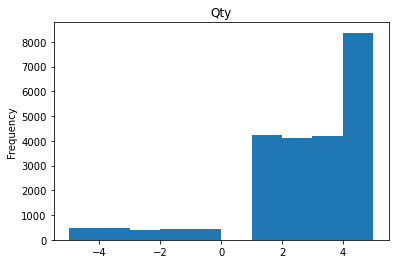

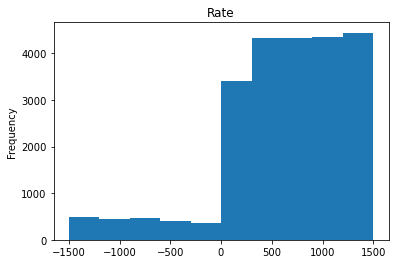

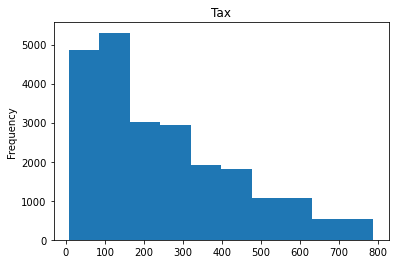

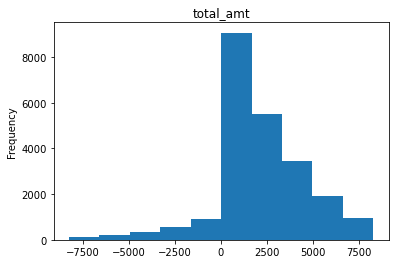

In [16]:
for var in continuous.columns:
    continuous[var].plot( kind = 'hist')
    plt.title(var)
    plt.show()

#### frequency bars for categorical variables

In [17]:
categorical = customer_final.loc[:,customer_final.dtypes=="object"]
categorical.head(1)

,Gender,Store_type,prod_cat,prod_subcat
0,M,e-Shop,Clothing,Women


C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


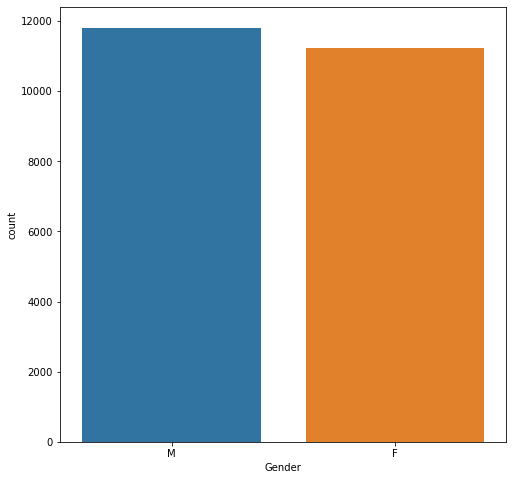

In [18]:
plt.figure(figsize=(8,8))
sns.countplot(categorical['Gender'])
plt.show()

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


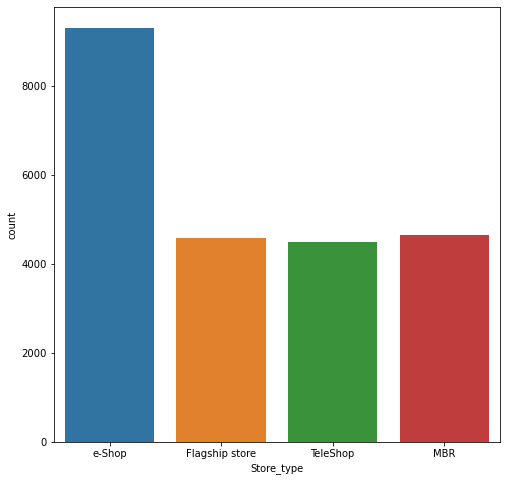

In [19]:
plt.figure(figsize=(8,8))
sns.countplot(categorical['Store_type'])
plt.show()

C:\Users\aksha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


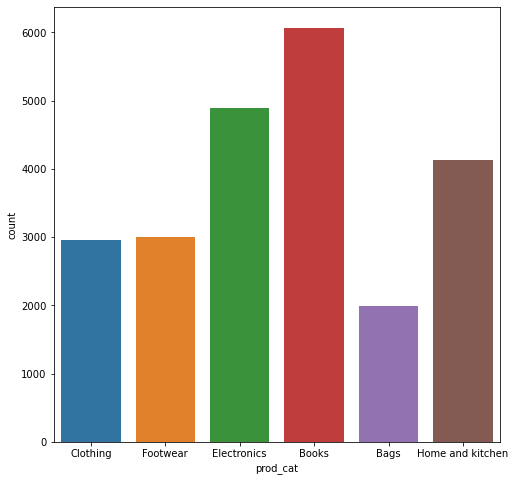

In [20]:
plt.figure(figsize=(8,8))
sns.countplot(categorical['prod_cat'])
plt.show()

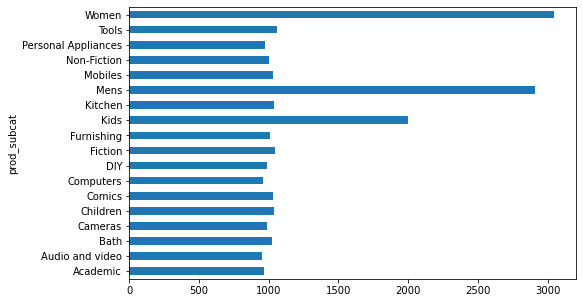

In [21]:
plt.figure(figsize=(8,5))
categorical.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')
plt.show()

### 4. Calculate the following information using the merged dataset :
a. Time period of the available transaction data

In [22]:
customer_final =customer_final.sort_values( by = 'tran_date').reset_index()
customer_final.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles


In [23]:
min_date= customer_final.tran_date.min()

In [24]:
max_date=customer_final.tran_date.max()

In [25]:
print('Time period of the available transaction data is from '  + pd.Timestamp.strftime(min_date, format = '%d-%m-%Y') 
      + ' to ' +
     pd.Timestamp.strftime(max_date, format = '%d-%m-%Y'))

Time period of the available transaction data is from 02-01-2011 to 02-12-2014


#### b. Count of transactions where the total amount of transaction was negative


In [26]:
customer_final.loc[customer_final.total_amt < 0 , 'transaction_id' ].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [27]:
prod_gender = customer_final.groupby(['prod_cat', 'Gender'])[['Qty']].sum().reset_index()
prod_gender

,prod_cat,Gender,Qty
0,Bags,F,2362
1,Bags,M,2346
2,Books,F,7070
3,Books,M,7587
4,Clothing,F,3425
5,Clothing,M,3748
6,Electronics,F,5832
7,Electronics,M,6476
8,Footwear,F,3716
9,Footwear,M,3555


product popular amoung male customers are :  
  1. books                                           
  2. clothing                                        
  3. electronic
  4. home & kitchen

product popular amoung male customers are :
 1. bags
 2. footwear

### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [28]:
city = customer_final.groupby('city_code')['customer_Id'].count().sort_values(ascending =False)
city

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [29]:
# percentage of customers from that city
percentage = round(city[4.0] / city.sum() *100, 2)
print('city code 4.0 has max customer and he percentage of customers from that city is ' , percentage)

city code 4.0 has max customer and he percentage of customers from that city is  10.51


### 7. Which store type sells the maximum products by value and by quantity?

In [30]:
customer_final.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles


In [31]:
customer_final.groupby('Store_type')[['Rate','Qty' ]].sum().sort_values( by = 'Qty' , ascending =False)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763
MBR,2953253,11194
Flagship store,2941557,11133
TeleShop,2834420,10984


In [32]:
print('e-Shop store type sells the maximum products by value and by quantity')

e-Shop store type sells the maximum products by value and by quantity


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [33]:
store = customer_final.pivot_table( values = 'total_amt', index= 'prod_cat' , columns = 'Store_type', aggfunc= 'sum')
store

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [34]:
print('The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is ' , 
      store.loc[['Electronics', 'Clothing'] , 'Flagship store'].sum())

The total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores is  3409559.2700000005


### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [35]:
customer_final.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles


In [36]:
gender = customer_final.pivot_table( values = 'total_amt' , index= 'Gender' , columns= 'prod_cat', aggfunc= 'sum')
gender

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2077985.65,6164692.235,3026750.805,5019354.210,3202552.99,4132177.335
M,2046722.99,6645972.775,3224079.495,5703109.425,3014672.05,4301075.480


In [37]:
print('The total amount earned from "Male" customers under the "Electronics" category is ', round(gender.loc['M', 'Electronics'],2))

The total amount earned from "Male" customers under the "Electronics" category is  5703109.43


### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [38]:
positive_trans = customer_final.loc[customer_final['total_amt'] >0 , :]
positive_trans.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles


In [39]:
unique = positive_trans.groupby( ['customer_Id', 'prod_cat', 'prod_subcat'] )[['transaction_id']].count().reset_index()
unique.head(2)

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2


In [40]:
unique_cnt = unique.groupby(['customer_Id'])[['transaction_id']].count().reset_index()
unique_cnt.head(2)

,customer_Id,transaction_id
0,266783,3
1,266784,3


In [41]:
unique_cnt[unique_cnt['transaction_id'] >10]

,customer_Id,transaction_id


In [42]:
print('there is no customers have more than 10 unique transactions')

there is no customers have more than 10 unique transactions


### 11. For all customers aged between 25 - 35, find out:
#### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [61]:
customer_final['age'] = (pd.Timestamp( 'now') - customer_final['DOB']).astype('<m8[Y]')
customer_final.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,age_group
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics,47.0,45-55
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles,34.0,25-35


In [55]:
customer_final['age_group'] = pd.cut(customer_final.age , bins = np.arange(15,65,10) ,labels=['15-25','25-35','35-45','45-55'] )
customer_final.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,age_group
0,21718,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics,47.0,45-55
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles,34.0,25-35


In [60]:
cust_25_35 = customer_final.loc[customer_final.age_group == '25-35']
cust_25_35.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,age_group
1,16878,269403,1986-11-09,M,8.0,95376486237,2011-01-02,4,3,5,673,353.325,3718.325,MBR,Electronics,Mobiles,34.0,25-35
4,11320,268624,1986-09-18,F,1.0,36332303449,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,34.0,25-35


In [65]:
spend_cat = cust_25_35.groupby('prod_cat')[['total_amt']].sum()

print('Total spend on Books and Electronics by 25-35 age group are')

spend_cat.loc[['Books','Electronics']].reset_index()

Total spend on Books and Electronics by 25-35 age group are


,prod_cat,total_amt
0,Books,4047297.865
1,Electronics,3592778.215


### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [69]:
cust_trans = cust_25_35.loc[(cust_25_35.tran_date >= '2014-01-01')&(cust_25_35.tran_date <='2014-03-01' )]
cust_trans.head(2)

,index,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,age,age_group
21991,4607,273627,1985-06-18,M,8.0,69368153122,2014-01-01,7,5,3,311,97.965,1030.965,TeleShop,Books,Fiction,35.0,25-35
21993,4599,268886,1992-08-03,M,1.0,63635040022,2014-01-01,3,2,5,652,342.300,3602.300,e-Shop,Footwear,Women,28.0,25-35


In [74]:
total_amount = round(cust_trans.total_amt.sum(),2)
print('The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is', total_amount)

The total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014 is 521984.32
